___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Метод главных компонент (Principal Component Analysis) - Проверочные задания

-----
-----

## Цель: выяснить с помощью метода главных компонент, какие написанные от руки цифры наиболее сильно отличаются друг от друга.

**Представьте, что Вы работаете с задачей распознавания изображений для почтовой компании. Было бы очень полезно читать цифры автоматически, даже если они написаны вручную (сейчас именно так и происходит в почтовых компаниях, причём распознавание цифр работает даже лучше, чем это может делать человек). Руководитель почтовой компании хотел бы выяснить, какие цифры распознаются наиболее сложно, чтобы можно было получить для этих цифр побольше размеченных данных. Вы будете работать с очень известным набором данных, который содержит написанные от руки цифры. С помощью метода главных компонент Вы выясните, какие цифры легче отличимы от других цифр.**

-----
-----

# Данные


Источник данных: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


## Выполните задания, написанные жирным шрифтом

**Задание: запустите ячейки для импорта библиотек и загрузки данных из файла в датафрейм.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
digits = pd.read_csv('digits.csv')

In [ ]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


**Задание: создайте новый датафрейм, назовите его *pixels*, в котором будут только значения для пикселей. Для этого удалите колонку number_label.**

In [ ]:
# Напишите Ваш код в этой ячейке
pixels = digits.drop('number_label',axis=1)

In [ ]:
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Выводим изображение на экран

**Задание: возьмите только один ряд пикселей - для этого возьмите первую строку в датафрейме pixels.**

In [ ]:
# Напишите Ваш код в этой ячейке
single_image = pixels.iloc[0]

In [ ]:
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

**Задание: преобразуйте полученный ранее объект Series (первая строка датафрейма) в массив numpy.**

In [ ]:
# Напишите Ваш код в этой ячейке
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Задание: поменяйте форму этого массива numpy в размерность (8,8) с помощью reshape.**

In [ ]:
# Напишите Ваш код в этой ячейке
single_image.to_numpy().shape

(64,)

(64,)

In [ ]:
single_image.to_numpy().reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**Задание: С помощью Matplotlib или Seaborn выведите этот массив на экран - должно получиться изображение цифры, написанной от руки. Помните что параметры palette/cmap могут менять цвета, но не могут менять значения пикселей.**

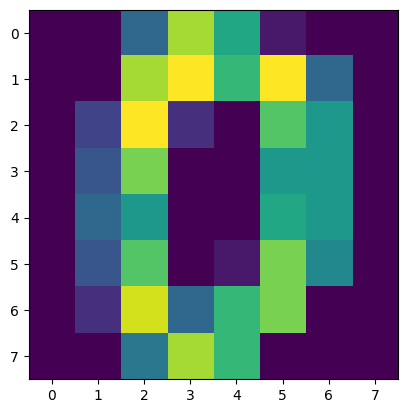

In [ ]:
# Напишите Ваш код в этой ячейке
plt.imshow(single_image.to_numpy().reshape(8,8))

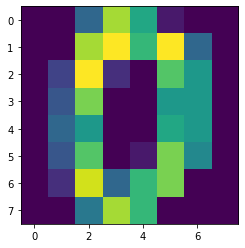

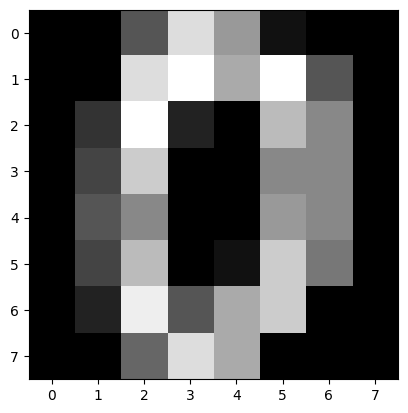

In [ ]:
plt.imshow(single_image.to_numpy().reshape(8,8),cmap='gray')

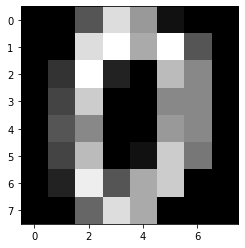

<Axes: >

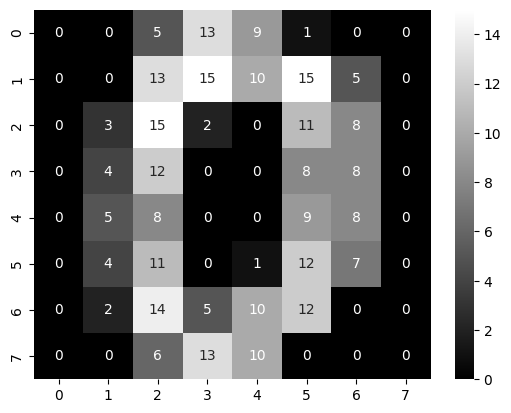

In [ ]:
sns.heatmap(single_image.to_numpy().reshape(8,8),annot=True,cmap='gray')

<AxesSubplot:>

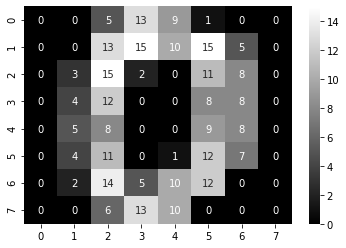

------

Далее мы перейдём к методу главных компонент.

## Масштабирование данных

**Задание: с помощью Scikit-Learn выполните масштабирование датафрейма с пикселями.**

In [ ]:
# Напишите Ваш код в этой ячейке
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_pixels = scaler.fit_transform(pixels)

In [ ]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## Метод главных компонент (PCA - Principal Component Analysis)

**Задание: примените метод главных компонент к промасштабированному набору пикселей, выделяя 2 главные компоненты.**

In [ ]:
# Напишите Ваш код в этой ячейке
from sklearn.decomposition import PCA

In [ ]:
pca_model = PCA(n_components=2)

In [ ]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

**Задание: выясните, сколько вариативности объясняется этими 2 главными компонентами.**

In [ ]:
# Напишите Ваш код в этой ячейке
np.sum(pca_model.explained_variance_ratio_)

0.21594970499773938

0.21594970492246052

**Задание: постройте график scatterplot для цифр в 2-мерном пространстве главных компонент, раскрашивая график разными цветами на основе колонки number_label в исходном датафрейме.**

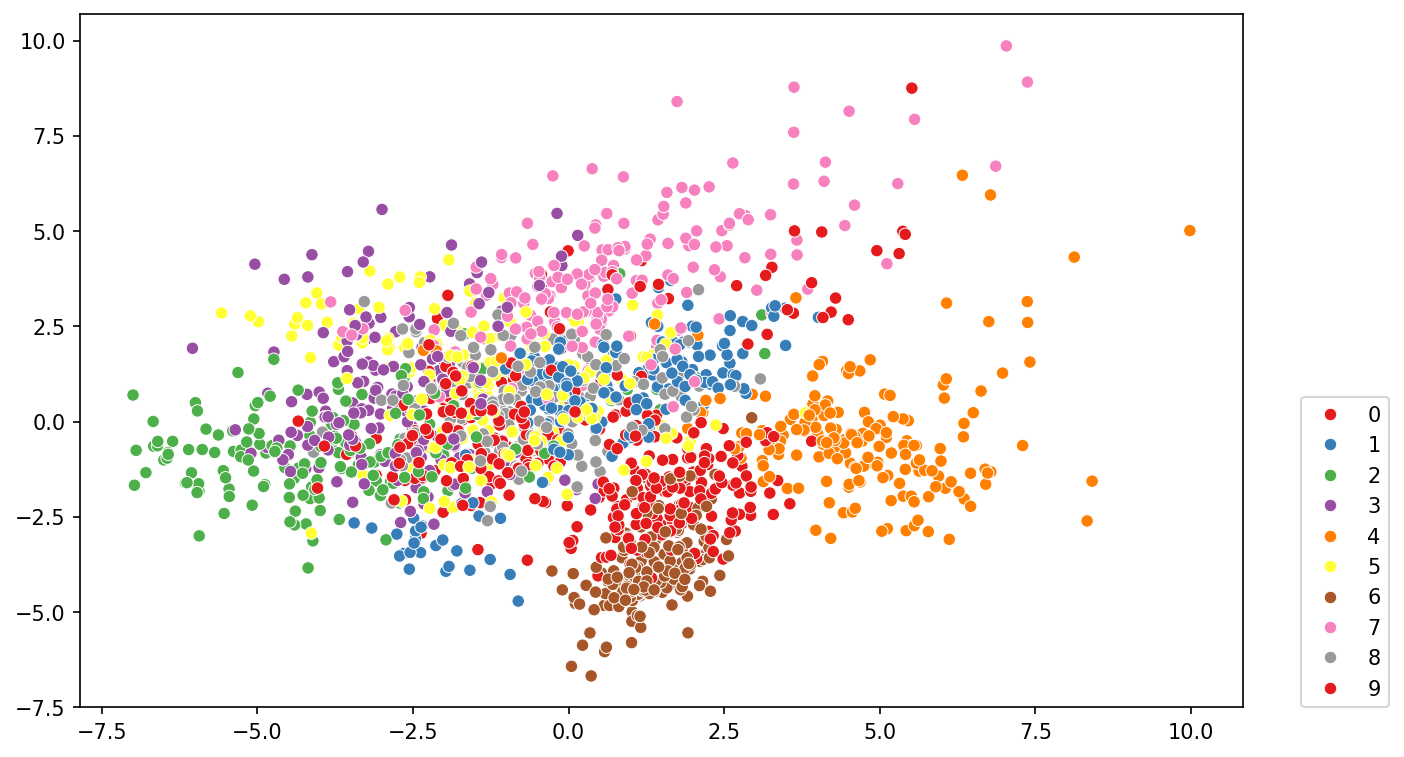

In [ ]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(10,6),dpi=150)
labels = digits['number_label'].values
sns.scatterplot(x = pca_pixels[:,0],y = pca_pixels[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))

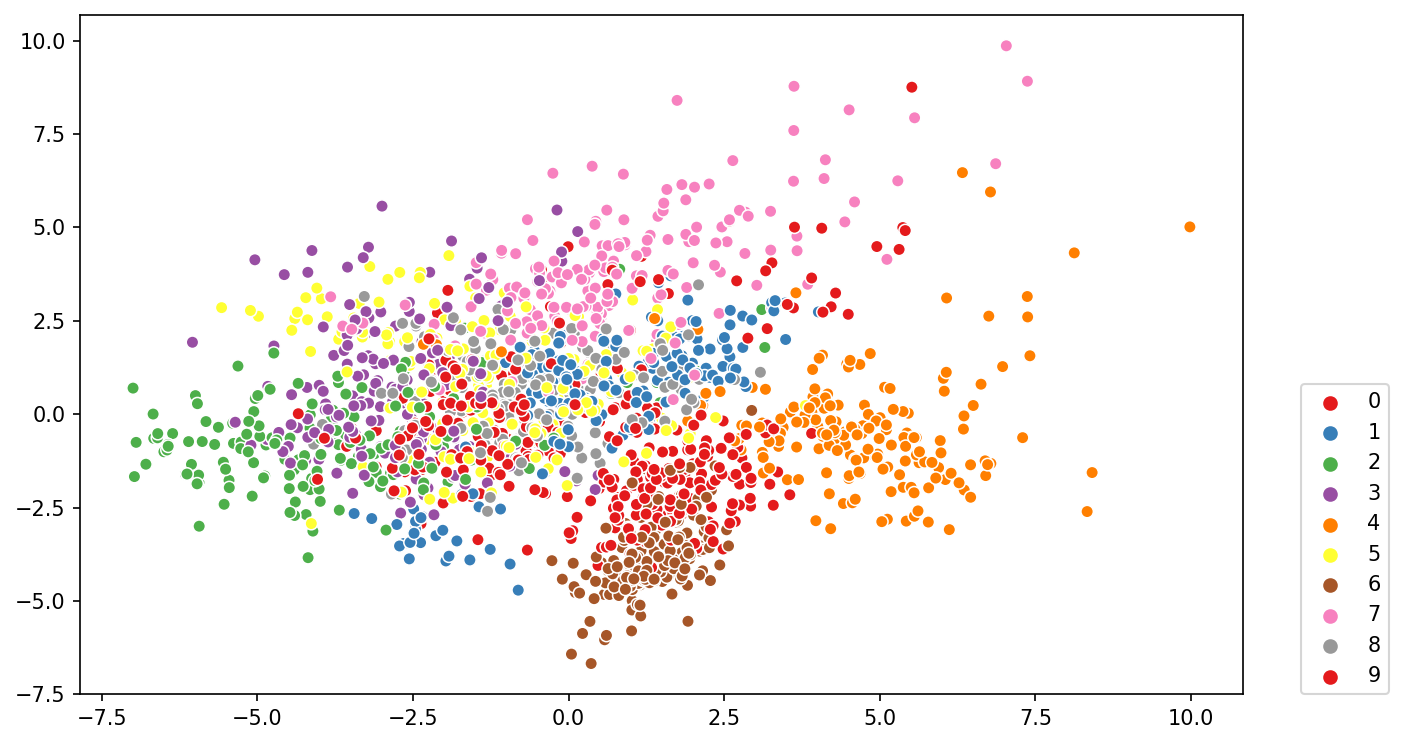

**Задание: какие цифры наиболее чётко отделимы друг от друга?**

In [ ]:
# Напишите Ваш ответ в этой ячейке

# лучше всего отделима цифра 4,
# а также цифры 2, 6  и 9.

-----------
---------

## Бонусное задание

**Задание: постройте "интерактивный" 3D-график с результатыми работы метода главных компонент для 3 главных компонент. Это можно сделать разными способами с помощью различных библиотек, например plotly или bokeh, но на самом деле это можно сделать с помощью только Matplotlib и Jupyter Notebook. При необходимости поищите решение в гугле или другом поисковике или на StackOverflow.**

In [ ]:
# Напишите Ваш код в этой ячейке
from sklearn.decomposition import PCA

In [ ]:
pca_model = PCA(n_components=3)

In [ ]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
df = pd.read_csv('digits.csv')

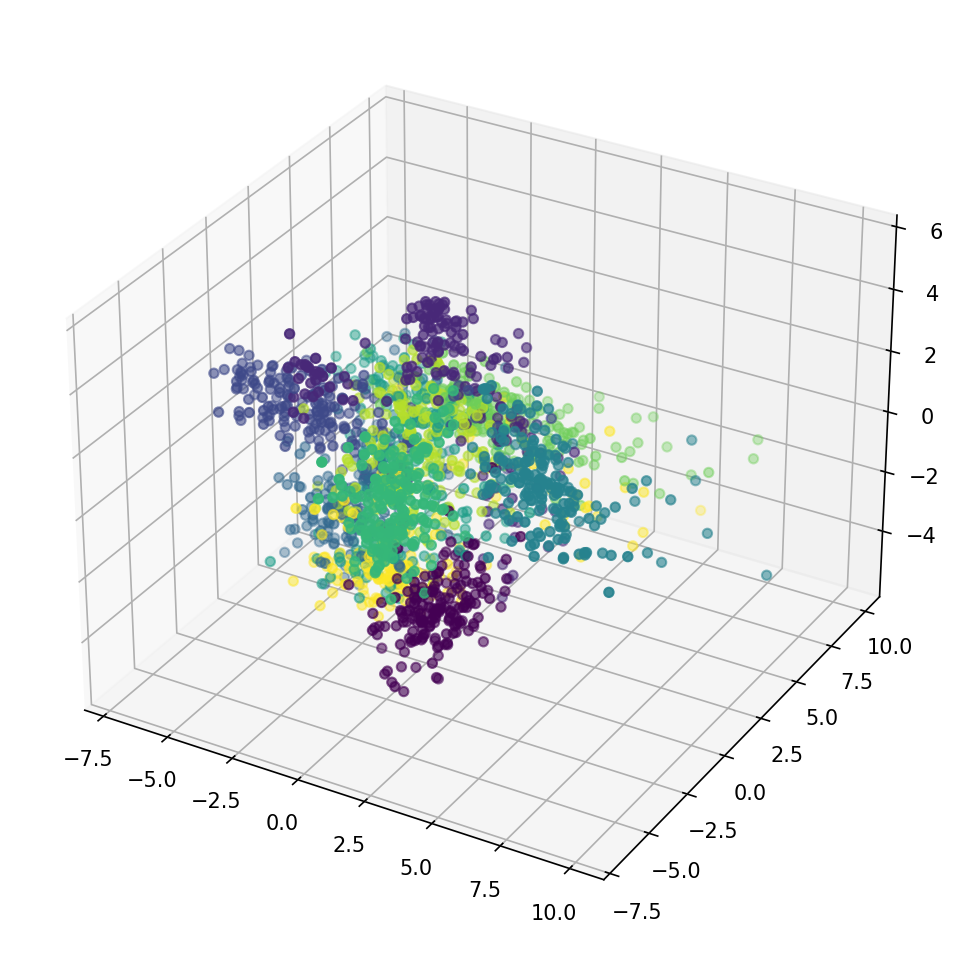

In [ ]:
plt.figure(figsize=(8,8),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=df['number_label']);

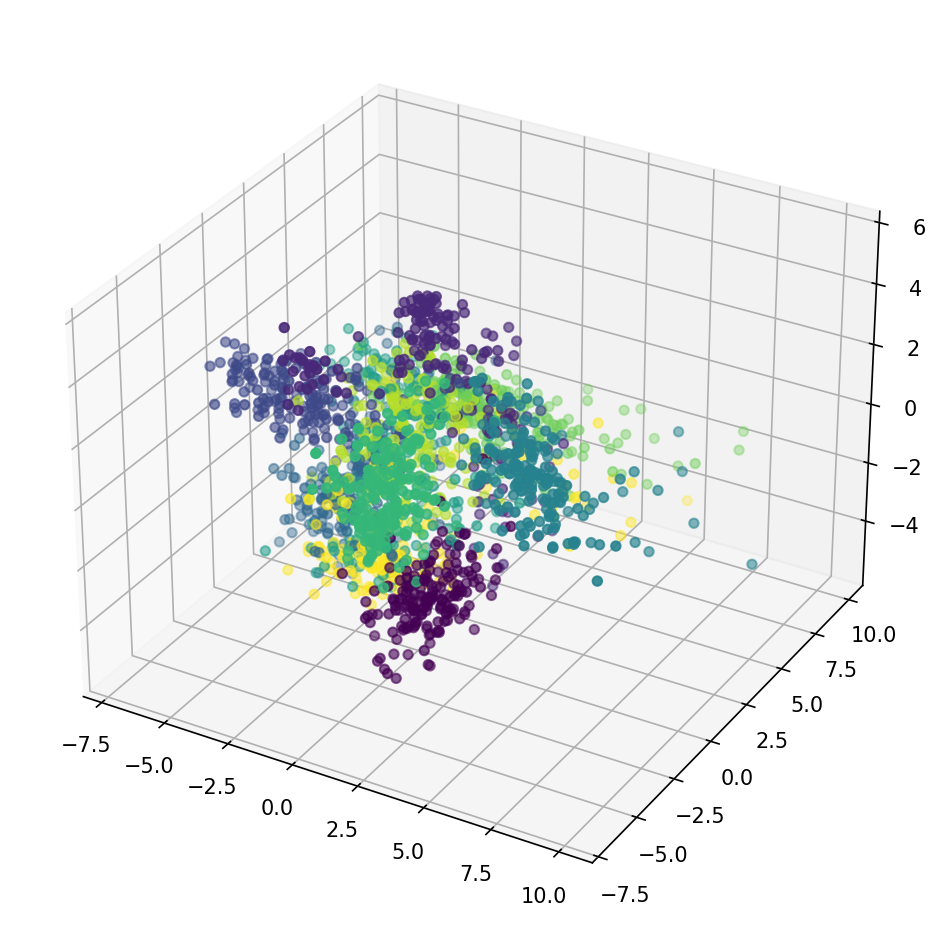

In [ ]:
%matplotlib notebook

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=df['number_label']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


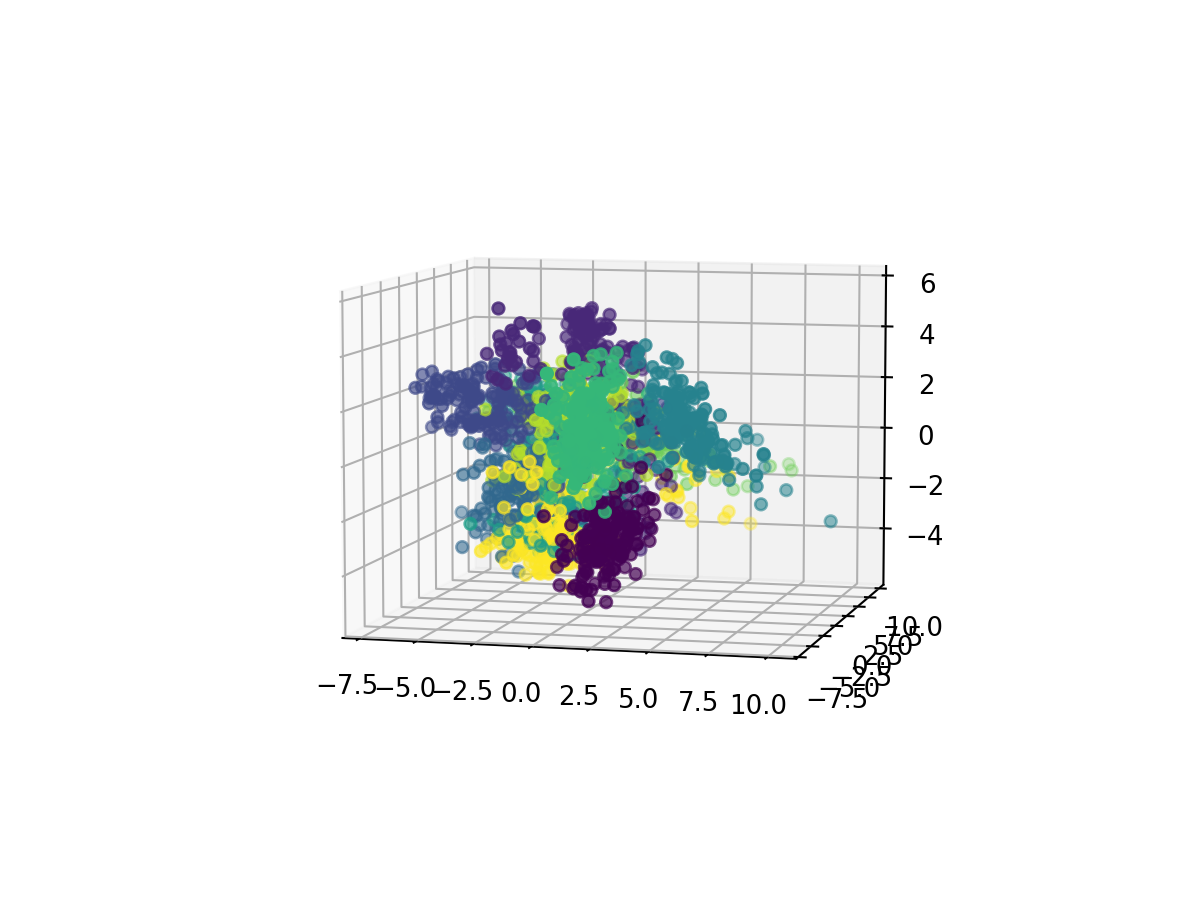

# Отличная работа!